In [1]:
import numpy as np
import pandas as pd
import ghibtools as gh
import matplotlib.pyplot as plt
from params import *
from configuration import *
from compute_rsa import rsa_job
from bibliotheque import df_baseline
import seaborn as sns

In [2]:
savefolder = base_folder / 'Figures' / 'RSA'

In [3]:
rows_df = []

ncols = len(session_keys)

for sub in subject_keys:
    print(sub)
    
    fig, axs = plt.subplots(ncols = ncols, figsize = (13,5), constrained_layout = True)
    fig.suptitle(f'Heart rate according to respiration phase in {sub}', y = 1.05, fontsize = 20)
    
    for c, session in enumerate(session_keys):
        run_key = f'{sub}_{session}'
        rsa = rsa_job.get(run_key)['rsa']
        phase = rsa.coords['phase'].values
        
        ax = axs[c]

        N = rsa.coords['cycle'].size

        mean_rsa = rsa.mean('cycle')
        rsa_delta =float(np.max(mean_rsa) - np.min(mean_rsa))
        rows_df.append([sub, session, rsa_delta])

        for cycle in rsa.coords['cycle'].values:
            ax.plot(phase, rsa.loc[cycle,:].values, color = 'k', lw = 0.4, alpha = 0.4)
        ax.plot(phase, mean_rsa.values, color = 'orange', lw = 5)
        ax.set_title(f'{session} - N : {N} - RSA : {round(rsa_delta, 2)} bpm') 
        ax.axvline(rsa_params['segment_ratios'], color = 'r')
        ax.set_ylim(30, 120)
        ax.set_ylabel('Heart Beat [bpm]')
        ax.set_xlabel('Respiratory phase')

    fig.savefig(savefolder / 'by_subject' / f'{sub}.png', bbox_inches = 'tight')
    plt.close()
        

P01
rsa is processing ('P01_baseline',)
rri_signal is processing ('P01_baseline',)
rsa is processing ('P01_music',)
rri_signal is processing ('P01_music',)
rsa is processing ('P01_odor',)
rri_signal is processing ('P01_odor',)
P02
rsa is processing ('P02_baseline',)
rri_signal is processing ('P02_baseline',)
rsa is processing ('P02_music',)
rri_signal is processing ('P02_music',)
rsa is processing ('P02_odor',)
rri_signal is processing ('P02_odor',)
P03
rsa is processing ('P03_baseline',)
rri_signal is processing ('P03_baseline',)
rsa is processing ('P03_music',)
rri_signal is processing ('P03_music',)
rsa is processing ('P03_odor',)
rri_signal is processing ('P03_odor',)
P04
rsa is processing ('P04_baseline',)
rri_signal is processing ('P04_baseline',)
rsa is processing ('P04_music',)
rri_signal is processing ('P04_music',)
rsa is processing ('P04_odor',)
rri_signal is processing ('P04_odor',)
P05
rsa is processing ('P05_baseline',)
rri_signal is processing ('P05_baseline',)
rsa is pr

In [4]:
df_rsa = pd.DataFrame(rows_df, columns = ['participant','session','rsa_amplitude'])
# df_rsa.to_excel(base_folder / 'Tables' / 'rsa.xlsx')

In [5]:
df_rsa = df_rsa[df_rsa['participant'] != 'P02']

In [6]:
df_rsa

,participant,session,rsa_amplitude
0,P01,baseline,3.347181
1,P01,music,3.006888
2,P01,odor,3.397378
6,P03,baseline,13.266380
7,P03,music,10.198925
8,P03,odor,12.634952
9,P04,baseline,4.781448
10,P04,music,4.155478
11,P04,odor,9.037225
12,P05,baseline,7.538019


In [7]:
df_rsa_baseline = df_baseline(df = df_rsa, indexes = ['participant','session'] , metrics = ['rsa_amplitude'])

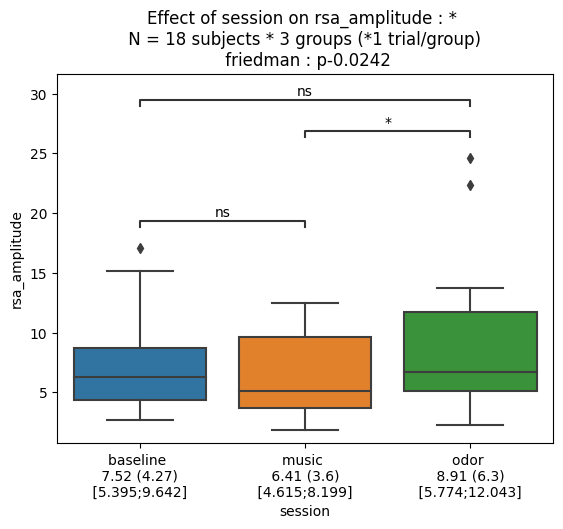

In [8]:
fig, ax = plt.subplots()
gh.auto_stats(df = df_rsa, predictor = 'session', outcome = 'rsa_amplitude', design = 'within', subject = 'participant', ax=ax)
file = savefolder / 'raw_rsa.png'
fig.savefig(file, bbox_inches = 'tight')

In [9]:
df_rsa_baseline

,participant,session,rsa_amplitude
0,P01,odor,1.014997
1,P03,odor,0.952404
2,P04,odor,1.890060
3,P05,odor,1.206489
4,P06,odor,2.370738
5,P07,odor,1.623622
6,P08,odor,1.307780
7,P09,odor,1.075017
8,P10,odor,1.206438
9,P11,odor,1.606394


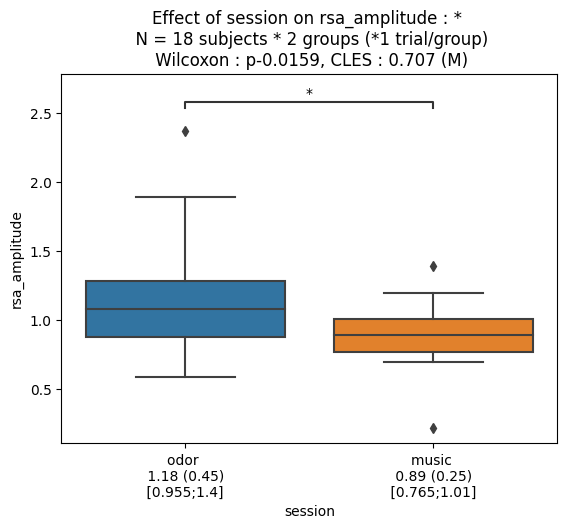

In [10]:
fig, ax = plt.subplots()
gh.auto_stats(df = df_rsa_baseline, predictor = 'session', outcome = 'rsa_amplitude', design = 'within', subject = 'participant', ax=ax)
file = savefolder / 'rsa_ratio_to_baseline.png'
fig.savefig(file, bbox_inches = 'tight')